# Up and Above
# 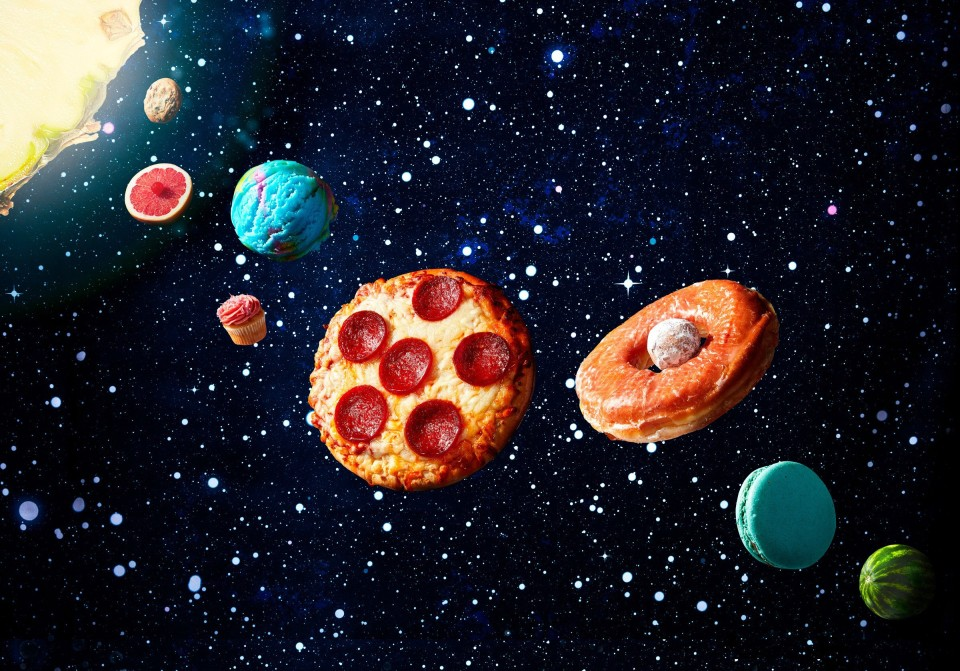

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv")


In [ ]:
df = df.drop(df.columns[[1,0]], axis = 1)

Extracting year,month and Day from Datum

In [ ]:
df['Year'] = df['Datum'].apply(lambda x:x[12:16])
df['Month'] = df['Datum'].apply(lambda x:x[4:8])
df['Day'] = df['Datum'].apply(lambda x: x.split()[0])

Extracting the name of country from Location

In [ ]:
df['Country'] = df['Location'].apply(lambda x: x.split()[-1])

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

pie_data=df['Country'].value_counts()
pie_data = pd.DataFrame(pie_data)
pie_data=pie_data.reset_index()
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = px.pie(pie_data, values='Country', names='index',title='Percentage of launches as per the countries')
fig.show()

In [ ]:
import plotly.express as px
fig = px.treemap(df, path=['Company Name'], height=650,title='Count of space missions as per companies')
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Month',data=df)
plt.xlabel('Count of launches of all the rockets as per the months')

In [ ]:
sns.countplot(x='Day',data=df)
plt.xlabel('Count of launches of all the rockets as per the days')

In [ ]:
df3 = df[df['Company Name'] != 'Sandia']
df3 = df3[df3['Company Name'] != 'AEB']
df3 = df3[df3['Company Name'] != 'ExPace']
df3 = df3[df3['Company Name'] != 'MITT']
df3 = df3[df3['Company Name'] != 'AMBA']
df3 = df3[df3['Company Name'] != 'Yuzhmash']
df3 = df3[df3['Company Name'] != 'CASIC']
df3 = df3[df3['Company Name'] != 'Douglas']
df3 = df3[df3['Company Name'] != 'OneSpace']
df3 = df3[df3['Company Name'] != 'Landspace']
df3 = df3[df3['Company Name'] != 'KARI']
df3 = df3[df3['Company Name'] != 'SRC']
df3 = df3[df3['Company Name'] != 'EER']
df3 = df3[df3['Company Name'] != 'Virgin Orbit']
df3 = df3[df3['Company Name'] != 'UT']
df3 = df3[df3['Company Name'] != 'ISA']
df3 = df3[df3['Company Name'] != 'IRGC']
df3 = df3[df3['Company Name'] != 'CECLES']
df3 = df3[df3['Company Name'] != 'Exos']
df3 = df3[df3['Company Name'] != 'i-Space']
df3 = df3[df3['Company Name'] != 'Starsem']
df3 = df3[df3['Company Name'] != 'Khrunichev']
df3 = df3[df3['Company Name'] != 'US Navy']
df3 = df3[df3['Company Name'] != 'KCST']
df3 = df3[df3['Company Name'] != 'RAE']
df3 = df3[df3['Company Name'] != 'OKB-586']
df3 = df3[df3['Company Name'] != 'CNES']
df3 = df3[df3['Company Name'] != 'JAXA']
df3 = df3[df3['Company Name'] != 'ESA']
df3 = df3[df3['Company Name'] != 'IAI']
df3 = df3[df3['Company Name'] != 'Rocket Lab']
df3 = df3[df3['Company Name'] != 'ASI']
df3 = df3[df3['Company Name'] != 'Land Launch']
df3 = df3[df3['Company Name'] != 'Eurockot']

In [ ]:
df1 = df3.pivot_table(values = 'Location', index=['Company Name'], columns='Status Mission',aggfunc='count')
df1 = df1.sort_values(by=['Success'],ascending = False)
df1 = df1.fillna(0)

cm4 = sns.light_palette("red", as_cmap=True)
cm5 = sns.light_palette("purple", as_cmap=True)
cm6 = sns.light_palette("gold", as_cmap=True)

cm = (df1.style
  .background_gradient(cmap=cm4, subset=['Failure']) 
  .background_gradient(cmap=cm5, subset=['Partial Failure']) 
  .background_gradient(cmap=cm6, subset=['Success'])
  .highlight_max(subset=['Success','Failure','Partial Failure'])
  .set_caption('Companies and their Sucess and Failure Counts')
  .format({'total_amt_usd_pct_diff': "{:.2%}"}))
cm

In [ ]:
df_russ = df[df['Company Name'] == 'RVSN USSR']
df_russ = df_russ[df_russ['Status Mission']=='Failure']
df_russ['Year'].value_counts()
ds = df_russ['Year'].value_counts().reset_index()
ds.columns = ['Year', 'count']
fig = px.scatter(ds, x='Year', y="count",orientation='v', title='Rocket failures of USSR', width=800)
fig.show()

In [ ]:
df8 = df[df['Status Mission']=='Failure']
df8['Year'].value_counts()
ds = df8['Year'].value_counts().reset_index()
ds.columns = ['Year', 'count']
fig = px.scatter(ds, x='Year', y="count",orientation='v', title='Count of Rocket failures wrt Years', width=800)
fig.show()

In [ ]:
df['Company Name'].value_counts().nlargest(5)

In [ ]:
df1 = df['Year'].value_counts().reset_index()
df1.columns = ['Year', 'count']
fig = px.scatter(df1, x='Year', y="count",orientation='v', title='Total Space Missions as per Years', width=800)
fig.show()

In [ ]:
df5=df[df['Company Name']=='NASA']
df5['Year'].value_counts()
ds = df5['Year'].value_counts().reset_index()
ds.columns = ['Year', 'count']
fig = px.scatter(ds, x='Year', y="count",orientation='v', title='NASA Missions', width=800)
fig.show()

In [ ]:
df5=df[df['Company Name']=='SpaceX']
df5['Year'].value_counts()
ds = df5['Year'].value_counts().reset_index()
ds.columns = ['Year', 'count']
fig = px.scatter(ds, x='Year', y="count",orientation='v', title='SpaceX Missions', width=800)
fig.show()

In [ ]:
df5=df[df['Company Name']=='ISRO']
df5['Year'].value_counts()
ds = df5['Year'].value_counts().reset_index()
ds.columns = ['Year', 'count']
fig = px.scatter(ds, x='Year', y="count",orientation='v', title='ISRO Missions', width=800)
fig.show()

In [ ]:
df5=df[df['Company Name']=='RVSN USSR']
df5['Year'].value_counts()
ds = df5['Year'].value_counts().reset_index()
ds.columns = ['Year', 'count']
fig = px.scatter(ds, x='Year', y="count",orientation='v', title='RVSN Missions', width=800)
fig.show()

In [ ]:
df3[' Rocket'] = df3[' Rocket'].str.replace(',', '')
df3[' Rocket'] = df3[' Rocket'].fillna(0)
df3[' Rocket'] = pd.to_numeric(df3[' Rocket'])
df3 = df3[df3[' Rocket'] < 3000]
df3 = df3[df3['Company Name'] != 'VKS RF']
df3 = df3[df3['Company Name'] != 'ISAS']
df3 = df3[df3['Company Name'] != 'Martin Marietta']
df3 = df3[df3['Company Name'] != 'Sea Launch']
df3 = df3[df3['Company Name'] != 'General Dynamics']

In [ ]:
plt.figure(figsize=(30,20))
sns.catplot(y = " Rocket", x = "Company Name", data = df3, kind="boxen", height = 4, aspect = 3)
plt.ylabel("Cost of rocket in Millions")
plt.show()